In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('train_call.tsv', sep='\t')

In [3]:
data = data.transpose()

In [27]:
data2 = data
data = data.drop(data.index[[1, 2, 3]])

In [13]:
samples =pd.read_csv('train_clinical.txt', sep='\t')

In [16]:
data.nunique(axis=1)

Chromosome      23
Start         2834
End           2834
Nclone         403
Array.129        4
              ... 
Array.10         4
Array.123        4
Array.100        3
Array.134        4
Array.130        4
Length: 104, dtype: int64

C:\Users\nikos\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


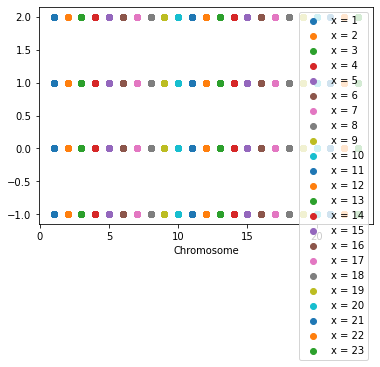

In [28]:
first_row = data.iloc[0]
distinct_x_values = first_row.unique()

datapoints = {x: [] for x in distinct_x_values}

for _, row in data.iloc[1:].iterrows():
    for x in distinct_x_values:
        datapoints[x].extend(row[first_row == x].tolist())

for x, points in datapoints.items():
    plt.scatter([x] * len(points), points, label=f'x = {x}')

plt.xlabel('Chromosome')
plt.ylabel('')
plt.title('')
plt.legend()
plt.show()